In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set display options
pd.set_option('display.max_columns', None)

In [3]:
# Step 2: Load the dataset
df = pd.read_csv('../data/raw/synthetic_user_data.csv')

In [4]:
# Step 3: View basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14965 entries, 0 to 14964
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               14965 non-null  object 
 1   session_date          14965 non-null  object 
 2   session_duration_min  14965 non-null  float64
 3   videos_watched        14965 non-null  int64  
 4   likes                 14965 non-null  int64  
 5   comments              14965 non-null  int64  
 6   is_retained_7d        14965 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 818.5+ KB


In [5]:
# Step 4: Preview the data
df.head()

,user_id,session_date,session_duration_min,videos_watched,likes,comments,is_retained_7d
0,user_1,2025-04-20,1.70,5,4,1,0
1,user_1,2025-04-20,2.39,5,2,0,0
2,user_1,2025-04-20,3.46,6,2,0,0
3,user_1,2025-04-25,0.67,7,2,0,0
4,user_1,2025-05-05,24.00,12,2,0,0


In [6]:
# Step 5: Summary statistics
df.describe()

,session_duration_min,videos_watched,likes,comments,is_retained_7d
count,14965.000000,14965.000000,14965.000000,14965.000000,14965.000000
mean,9.993971,7.036351,2.111126,0.693284,0.147745
std,10.004952,2.630403,1.442199,0.832070,0.354859
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000,5.000000,1.000000,0.000000,0.000000
50%,6.940000,7.000000,2.000000,1.000000,0.000000
75%,13.830000,9.000000,3.000000,1.000000,0.000000
max,88.190000,22.000000,9.000000,6.000000,1.000000


In [8]:
# Step 6: Check for missing values
df.isnull().sum()

user_id                 0
session_date            0
session_duration_min    0
videos_watched          0
likes                   0
comments                0
is_retained_7d          0
dtype: int64

In [13]:
print(df.columns.tolist())

['user_id', 'session_date', 'session_duration_min', 'videos_watched', 'likes', 'comments', 'is_retained_7d']


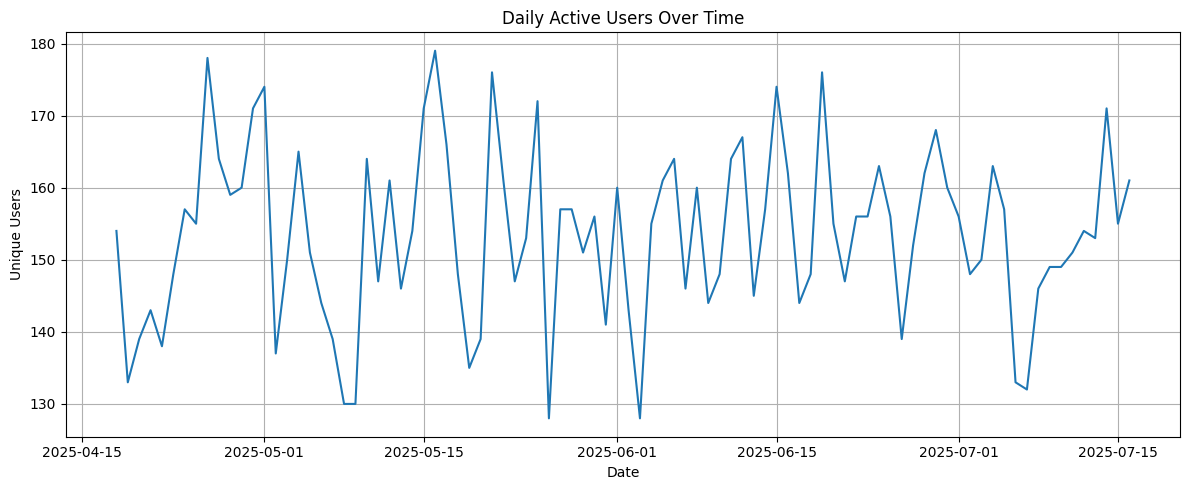

In [14]:
# Convert timestamp to datetime (if not already)
df['session_date'] = pd.to_datetime(df['session_date'])

daily_users = df.groupby('session_date')['user_id'].nunique().reset_index()
daily_users.columns = ['Date', 'Unique Users']

df['engagement'] = df['likes'] + df['comments'] + df['videos_watched']

# Aggregate engagement per day
daily_engagement = df.groupby('session_date')['engagement'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='Date', y='Unique Users', data=daily_users)
plt.title('Daily Active Users Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Users')
plt.grid(True)
plt.tight_layout()
plt.show()

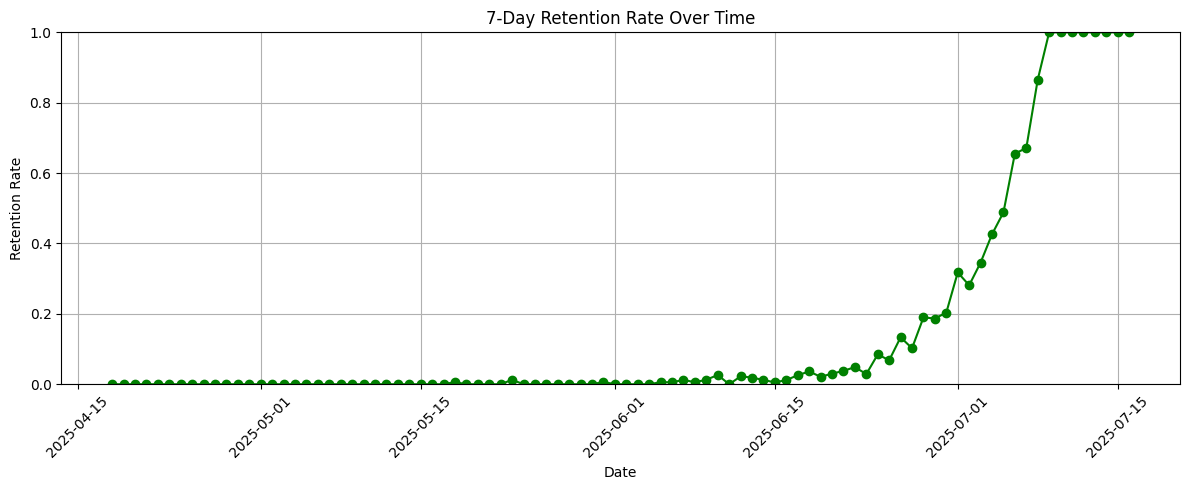

In [15]:
# Convert to datetime if not already
df['session_date'] = pd.to_datetime(df['session_date'])

# Group by date and calculate retention rate
daily_retention = df.groupby('session_date')['is_retained_7d'].mean().reset_index()
daily_retention.columns = ['Date', 'Retention Rate']

# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_retention['Date'], daily_retention['Retention Rate'], marker='o', color='green')
plt.title('7-Day Retention Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Retention Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

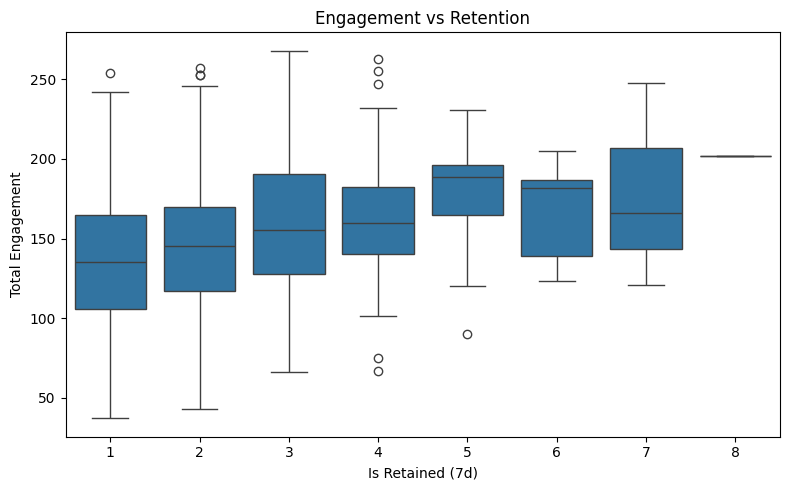

In [17]:
# Group by user to get total engagement per user
user_engagement = df.groupby('user_id')[['likes', 'comments', 'videos_watched', 'is_retained_7d']].sum().reset_index()

# Calculate overall engagement per user
user_engagement['total_engagement'] = (
    user_engagement['likes'] +
    user_engagement['comments'] +
    user_engagement['videos_watched']
)

# Plot: Engagement vs Retention
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=user_engagement, x='is_retained_7d', y='total_engagement')
plt.title('Engagement vs Retention')
plt.xlabel('Is Retained (7d)')
plt.ylabel('Total Engagement')
plt.tight_layout()
plt.show()

In [19]:
# Add day of week column
df['day_of_week'] = df['session_date'].dt.day_name()

# Group by day and aggregate engagement metrics
heatmap_data = df.groupby('day_of_week')[['videos_watched', 'likes', 'comments']].mean()

# Optional: Order days of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

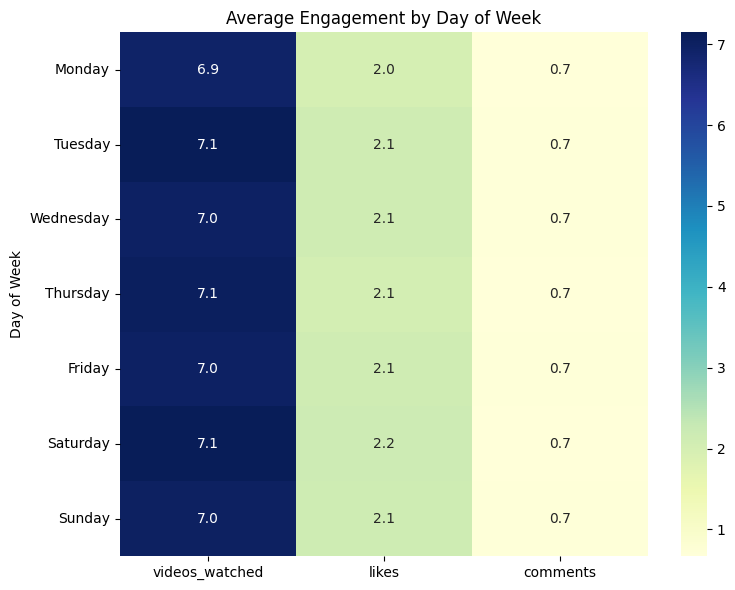

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Engagement by Day of Week')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

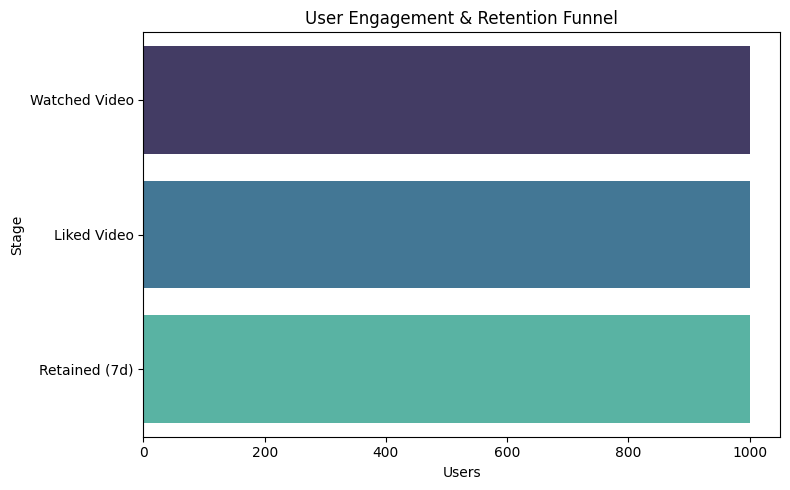

In [22]:
# Total users
total_users = df['user_id'].nunique()

# Watched videos (assume everyone has a session, so same as total_users)
watched_video = total_users

# Liked at least one video
liked_video = df[df['likes'] > 0]['user_id'].nunique()

# Retained users
retained = df[df['is_retained_7d'] == 1]['user_id'].nunique()

# Build funnel data
funnel = pd.DataFrame({
    'Stage': ['Watched Video', 'Liked Video', 'Retained (7d)'],
    'Users': [watched_video, liked_video, retained]
})

# Plot funnel
plt.figure(figsize=(8, 5))
sns.barplot(x='Users', y='Stage', hue='Stage', data=funnel, palette='mako', legend=False)
plt.title('User Engagement & Retention Funnel')
plt.tight_layout()
plt.show()

In [23]:
df['session_date'] = pd.to_datetime(df['session_date'])
df['weekday'] = df['session_date'].dt.day_name()

In [25]:
engagement_by_day = df.groupby('weekday').agg({
    'user_id': 'nunique',
    'videos_watched': 'sum',
    'likes': 'sum',
    'comments': 'sum'
}).reset_index()

# Sort days of week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
engagement_by_day['weekday'] = pd.Categorical(engagement_by_day['weekday'], categories=ordered_days, ordered=True)
engagement_by_day = engagement_by_day.sort_values('weekday')

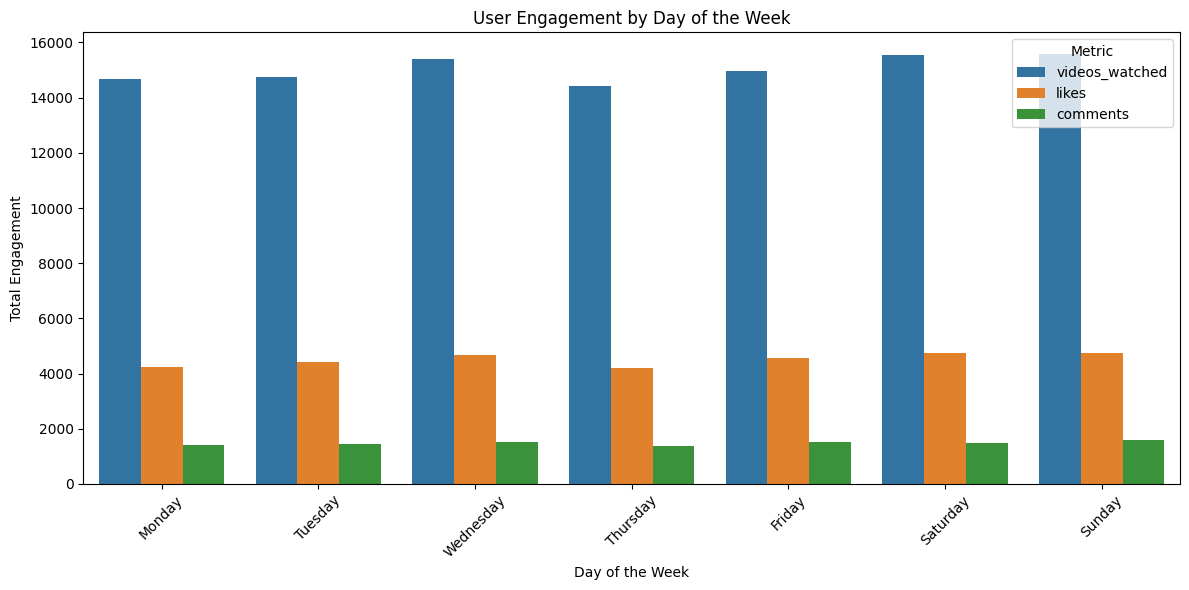

In [26]:
plt.figure(figsize=(12, 6))
engagement_by_day_melted = engagement_by_day.melt(id_vars='weekday', 
                                                   value_vars=['videos_watched', 'likes', 'comments'],
                                                   var_name='Metric', value_name='Total')
sns.barplot(x='weekday', y='Total', hue='Metric', data=engagement_by_day_melted)
plt.title('User Engagement by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df['session_date'] = pd.to_datetime(df['session_date'])
signup_dates = df.groupby('user_id')['session_date'].min().reset_index()
signup_dates.columns = ['user_id', 'signup_date']

# Merge with main dataframe
df = df.merge(signup_dates, on='user_id')
df['days_since_signup'] = (df['session_date'] - df['signup_date']).dt.days
cohort = df[df['days_since_signup'] <= 7]
retention = cohort.groupby(['signup_date', 'days_since_signup'])['user_id'].nunique().unstack(fill_value=0)
retention_percent = retention.divide(retention[0], axis=0).round(2)

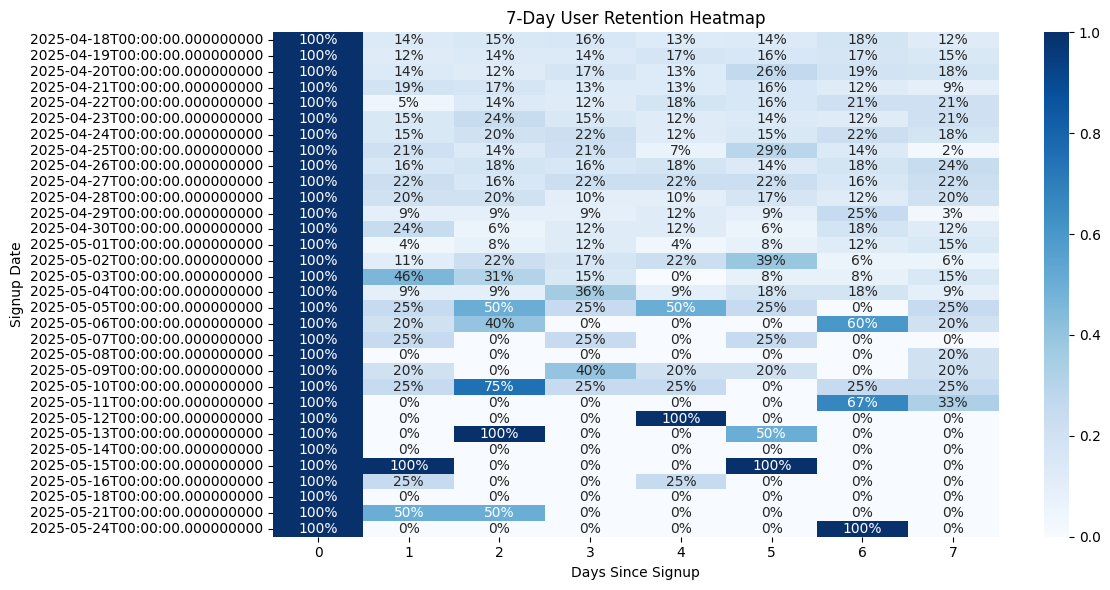

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(retention_percent, annot=True, fmt='.0%', cmap='Blues')
plt.title('7-Day User Retention Heatmap')
plt.xlabel('Days Since Signup')
plt.ylabel('Signup Date')
plt.tight_layout()
plt.show()